In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Input, Dense, Concatenate
import ast

In [2]:
class_weights = np.load("processed data new\\class_weights_equal.npy")
class_weights

array([  1.        ,   1.        ,   1.        ,   3.00615831,
         3.00615831,   3.00615831,   5.16445897,   5.16445897,
         5.16445897,   5.20610422,   5.20610422,   5.20610422,
         5.67343853,   5.67343853,   5.67343853,   5.82705745,
         5.82705745,   5.82705745,   7.34189288,   7.34189288,
         7.34189288,   7.93471653,   7.93471653,   7.93471653,
         9.3683882 ,   9.3683882 ,   9.3683882 ,  15.02176632,
        15.02176632,  15.02176632,  16.04543025,  16.04543025,
        16.04543025,  17.74815253,  17.74815253,  17.74815253,
        19.13994262,  19.13994262,  19.13994262,  20.09437751,
        20.09437751,  20.09437751,  23.46307151,  23.46307151,
        23.46307151,  25.21713566,  25.21713566,  25.21713566,
        31.86942675,  31.86942675,  31.86942675,  32.89972603,
        32.89972603,  32.89972603,  35.25660599,  35.25660599,
        35.25660599,  42.82596291,  42.82596291,  42.82596291,
        43.82627737,  43.82627737,  43.82627737,  45.00

In [3]:
w = tf.constant(class_weights, dtype=tf.float32)

@tf.keras.utils.register_keras_serializable()
def weighted_bce(y_true, y_pred):
    y_pred = tf.clip_by_value(y_pred, 1e-7, 1 - 1e-7)
    loss = - w * (y_true * tf.math.log(y_pred) + (1 - y_true) * tf.math.log(1 - y_pred))
    return tf.reduce_mean(tf.reduce_sum(loss, axis=1))


In [33]:
#average(class) recall

def avg_recall(y_true, y_pred):
    y_pred = tf.round(y_pred)
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    tp = tf.reduce_sum(y_true * y_pred, axis=0)
    fn = tf.reduce_sum(y_true * (1 - y_pred), axis=0)
    
    recall = tf.math.divide_no_nan(tp, tp + fn)
    return tf.reduce_mean(recall)

def avg_precision(y_true, y_pred):
    y_pred = tf.round(y_pred)
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    tp = tf.reduce_sum(y_true * y_pred, axis=0)
    fp = tf.reduce_sum((1 - y_true) * y_pred, axis=0)
    
    precision = tf.math.divide_no_nan(tp, tp + fp)
    return tf.reduce_mean(precision)

def accuracy(y_true, y_pred):
    y_pred = tf.round(y_pred)
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    correct_predictions = tf.reduce_sum(tf.cast(tf.equal(y_true, y_pred), tf.float32), axis=0)
    return tf.reduce_mean(correct_predictions / tf.cast(tf.shape(y_true)[0], tf.float32))


In [34]:
#individual recall

def ind_recall(y_true, y_pred):
    y_pred = tf.round(y_pred)
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    tp = tf.reduce_sum(y_true * y_pred, axis=0)
    fn = tf.reduce_sum(y_true * (1 - y_pred), axis=0)
    
    recall = tf.math.divide_no_nan(tp, tp + fn)
    return recall


def ind_precision(y_true, y_pred):
    y_pred = tf.round(y_pred)
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    tp = tf.reduce_sum(y_true * y_pred, axis=0)
    fp = tf.reduce_sum((1 - y_true) * y_pred, axis=0)
    
    precision = tf.math.divide_no_nan(tp, tp + fp)
    return precision

def ind_accuracy(y_true, y_pred):
    y_pred = tf.round(y_pred)
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    correct_predictions = tf.reduce_sum(tf.cast(tf.equal(y_true, y_pred), tf.float32), axis=0)
    return correct_predictions / tf.cast(tf.shape(y_true)[0], tf.float32)


In [ ]:
model = tf.keras.models.load_model("models\\final_model.keras")
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ facts (InputLayer)  │ (None, 768)       │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ considerations      │ (None, 768)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ facts_dense1        │ (None, 600)       │    461,400 │ facts[0][0]       │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ considerations_den… │ (None, 600)       │    461,400 │ considerations[0… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu         │ (None, 600)       │          0 │ facts_dense1[0][… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_2       │ (None, 600)       │          0 │ considerations_d… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 600)       │          0 │ leaky_re_lu[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 600)       │          0 │ leaky_re_lu_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ facts_dense2        │ (None, 450)       │    270,450 │ dropout[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ considerations_den… │ (None, 450)       │    270,450 │ dropout_2[0][0]   │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_1       │ (None, 450)       │          0 │ facts_dense2[0][… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_3       │ (None, 450)       │          0 │ considerations_d… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ law_area            │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ language            │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 450)       │          0 │ leaky_re_lu_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 450)       │          0 │ leaky_re_lu_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 908)       │          0 │ law_area[0][0],   │
│ (Concatenate)       │                   │            │ language[0][0],   │
│                     │                   │            │ dropout_1[0][0],  │
│                     │                   │            │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_dense1  │ (None, 700)       │    636,300 │ concatenate[0][0

 Total params: 7,723,325 (29.46 MB)

 Trainable params: 2,573,641 (9.82 MB)

 Non-trainable params: 2,400 (9.38 KB)

 Optimizer params: 5,147,284 (19.64 MB)

TEST DATA

In [9]:
df_test = pd.read_csv('processed data new\\sep_selected_laws_test_new_encoded.csv')
df_test

,law_area_0,law_area_1,law_area_2,law_area_3,law_area_4,language_0,language_1,language_2,facts_0,facts_1,...,laws_231,laws_232,laws_233,laws_234,laws_235,laws_236,laws_237,laws_238,laws_239,laws_240
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.019240,-0.015930,...,0,0,0,0,0,0,0,0,0,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.012180,-0.050890,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.031751,-0.037796,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.005475,-0.025251,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.047793,-0.032956,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8896,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.006010,-0.000475,...,0,0,0,0,0,0,0,0,0,0
8897,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.024508,-0.036798,...,0,0,0,0,0,0,0,0,0,0
8898,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.008669,-0.035200,...,0,0,0,0,0,0,0,0,0,0
8899,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.003880,-0.018592,...,0,0,0,0,0,0,0,0,0,0


In [10]:
law_area_test= df_test.values[:,0:5]
language_test = df_test.values[:,5:8]
facts_test= df_test.values[:,8:776]
considerations_test= df_test.values[:,776:1544]
laws_test= df_test.values[:,1544:]

In [14]:
test_prediction=(model.predict([law_area_test, language_test, facts_test, considerations_test],batch_size=512) > 0.5).astype(int)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [ ]:
individual_precision = ind_precision(laws_test, test_prediction).numpy()
print("Individual precision",individual_precision)
print("Average precision",np.mean(individual_precision))

Individual precision [0.9921981  0.9921981  0.9921981  0.60702986 0.60702986 0.60702986
 0.7281153  0.7281153  0.7281153  0.7587086  0.7587086  0.75935376
 0.6922525  0.6922525  0.6922525  0.75502515 0.75502515 0.75502515
 0.7818999  0.7818999  0.7818999  0.6411483  0.6411483  0.6411483
 0.6114551  0.6114551  0.6114551  0.6512821  0.6512821  0.6512821
 0.5960265  0.5960265  0.5960265  0.5462185  0.5462185  0.5462185
 0.7083333  0.7083333  0.7083333  0.847561   0.847561   0.847561
 0.7846154  0.7846154  0.7846154  0.8507463  0.8507463  0.8507463
 0.8505155  0.8505155  0.8505155  0.7209302  0.7209302  0.7209302
 0.8300971  0.8300971  0.8300971  0.88235295 0.88235295 0.88235295
 0.8        0.8        0.8        0.82474226 0.82474226 0.82474226
 0.5652174  0.5652174  0.5652174  0.5301205  0.5301205  0.5301205
 0.73333335 0.73333335 0.73333335 0.6666667  0.6666667  0.6666667
 0.8717949  0.8717949  0.8717949  0.8666667  0.8666667  0.8666667
 1.         1.         1.         0.6547619  0.6626

In [28]:
individual_recall = ind_recall(laws_test, test_prediction).numpy()
print("Individual recall",individual_recall)
print("Average recall",np.mean(individual_recall))

Individual recall [0.9938838  0.9938838  0.9938838  0.78109455 0.78109455 0.78109455
 0.5417625  0.5417625  0.5417625  0.64430016 0.64430016 0.64430016
 0.81365937 0.81365937 0.81365937 0.5458674  0.5458674  0.5458674
 0.89395887 0.89395887 0.89395887 0.50661623 0.50661623 0.50661623
 0.74248123 0.74248123 0.74248123 0.6365915  0.6365915  0.6365915
 0.77253217 0.77253217 0.77253217 0.2559055  0.2559055  0.2559055
 0.08415841 0.08415841 0.08415841 0.3341346  0.3341346  0.3341346
 0.36690646 0.36690646 0.36690646 0.5135135  0.5135135  0.5135135
 0.6903766  0.6903766  0.6903766  0.26956522 0.26956522 0.26956522
 0.8066038  0.8066038  0.8066038  0.38961038 0.38961038 0.38961038
 0.4952381  0.4952381  0.4952381  0.5298013  0.5298013  0.5298013
 0.60465115 0.60465115 0.60465115 0.7457627  0.7457627  0.7457627
 0.26506025 0.26506025 0.26506025 0.31578946 0.31578946 0.31578946
 0.5964912  0.5964912  0.5964912  0.4642857  0.4642857  0.4642857
 0.18181819 0.18181819 0.18181819 0.9166667  0.91666

In [35]:
individual_accuracy = ind_accuracy(laws_test, test_prediction).numpy()
print("Individual accuracy",individual_accuracy)
print("Average accuracy",np.mean(individual_accuracy))

Individual accuracy [0.9861813  0.9861813  0.9861813  0.8200202  0.8200202  0.8200202
 0.90315694 0.90315694 0.90315694 0.91270643 0.91270643 0.9128188
 0.9269745  0.9269745  0.9269745  0.92191887 0.92191887 0.92191887
 0.9378722  0.9378722  0.9378722  0.9538254  0.9538254  0.9538254
 0.9128188  0.9128188  0.9128188  0.9684305  0.9684305  0.9684305
 0.9803393  0.9803393  0.9803393  0.9726997  0.9726997  0.9726997
 0.9784294  0.9784294  0.9784294  0.96607125 0.96607125 0.96607125
 0.9885406  0.9885406  0.9885406  0.9928098  0.9928098  0.9928098
 0.9884283  0.9884283  0.9884283  0.9892147  0.9892147  0.9892147
 0.99146163 0.99146163 0.99146163 0.9942703  0.9942703  0.9942703
 0.9925851  0.9925851  0.9925851  0.9901135  0.9901135  0.9901135
 0.9958432  0.9958432  0.9958432  0.99393326 0.99393326 0.99393326
 0.99224806 0.99224806 0.99224806 0.99820244 0.99820244 0.99820244
 0.9968543  0.9968543  0.9968543  0.9961802  0.9961802  0.9961802
 0.99898887 0.99898887 0.99898887 0.9961802  0.99629

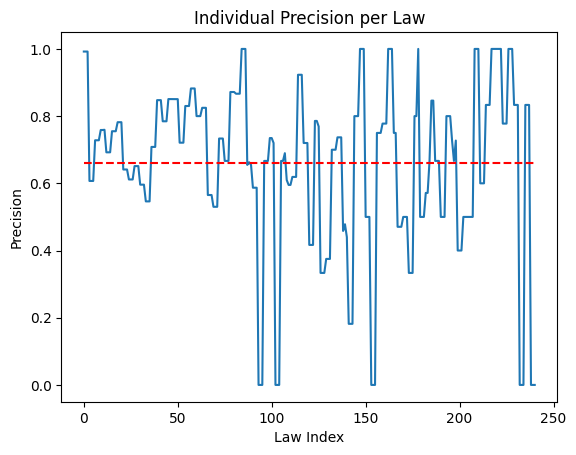

In [31]:
import matplotlib.pyplot as plt

plt.plot(range(241), individual_precision.tolist())
plt.plot(range(241), np.mean(individual_precision) * np.ones(241), 'r--')
plt.title('Individual Precision per Law')
plt.xlabel('Law Index')
plt.ylabel('Precision')
plt.show()

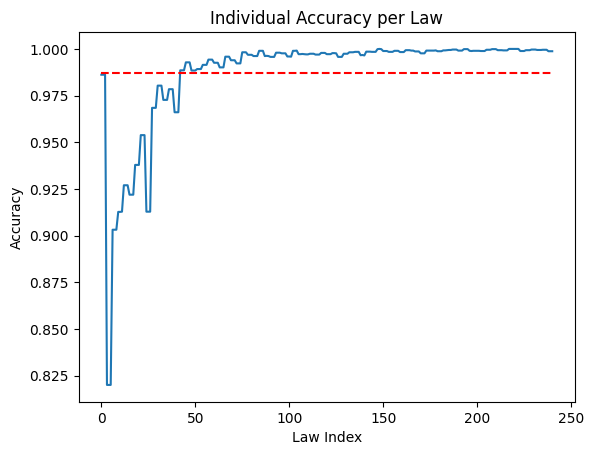

In [36]:
import matplotlib.pyplot as plt

plt.plot(range(241), individual_accuracy.tolist())
plt.plot(range(241), np.mean(individual_accuracy) * np.ones(241), 'r--')
plt.title('Individual Accuracy per Law')
plt.xlabel('Law Index')
plt.ylabel('Accuracy')
plt.show()

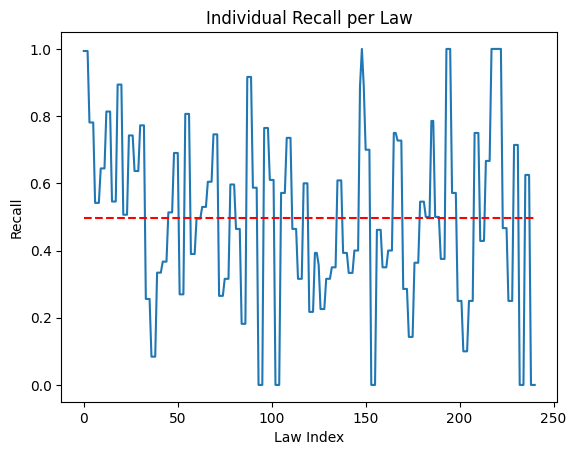

In [32]:
import matplotlib.pyplot as plt

plt.plot(range(241), individual_recall.tolist())
plt.plot(range(241), np.mean(individual_recall) * np.ones(241), 'r--')
plt.title('Individual Recall per Law')
plt.xlabel('Law Index')
plt.ylabel('Recall')
plt.show()

TRAINING DATA

In [42]:
df_test = pd.read_csv('processed data new\\sep_selected_laws_train_new_encoded.csv').drop(columns=['Unnamed: 0'])
df_test

,law_area_0,law_area_1,law_area_2,law_area_3,law_area_4,language_0,language_1,language_2,facts_0,facts_1,...,laws_231,laws_232,laws_233,laws_234,laws_235,laws_236,laws_237,laws_238,laws_239,laws_240
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.015351,-0.026758,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.005716,-0.040029,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.025519,-0.022643,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000465,-0.037652,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.020556,-0.038797,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81201,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.000018,-0.023062,...,0,0,0,0,0,0,0,0,0,0
81202,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.007661,-0.017937,...,0,0,0,0,0,0,0,0,0,0
81203,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.033467,-0.025747,...,0,0,0,0,0,0,0,0,0,0
81204,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.002088,-0.020699,...,0,0,0,0,0,0,0,0,0,0


In [43]:
law_area_test= df_test.values[:,0:5]
language_test = df_test.values[:,5:8]
facts_test= df_test.values[:,8:776]
considerations_test= df_test.values[:,776:1544]
laws_test= df_test.values[:,1544:]

In [44]:
test_prediction=(model.predict([law_area_test, language_test, facts_test, considerations_test],batch_size=512) > 0.5).astype(int)


159/159 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step


In [45]:
individual_precision = ind_precision(laws_test, test_prediction).numpy()
print("Individual precision",individual_precision)
print("Average precision",np.mean(individual_precision))

Individual precision [0.9201817  0.9201817  0.9201817  0.6500208  0.6500208  0.6500748
 0.7253983  0.7253983  0.7253983  0.78731304 0.78731304 0.78739655
 0.70925456 0.70925456 0.7092292  0.7976603  0.79768956 0.79768956
 0.7085564  0.7084848  0.7085143  0.8124642  0.8123209  0.8124642
 0.5667502  0.56666666 0.56666666 0.70210606 0.70192796 0.70210606
 0.72238404 0.7226081  0.7228322  0.6442591  0.6442591  0.6442591
 0.72337663 0.7243173  0.72337663 0.90957445 0.90957445 0.90957445
 0.835553   0.835553   0.835553   0.9418549  0.9418828  0.9418549
 0.86147183 0.86147183 0.86147183 0.7217631  0.7215074  0.7217631
 0.8409229  0.8404126  0.8409229  0.7445743  0.7445743  0.7445743
 0.9114155  0.9114155  0.9114155  0.85499465 0.8548387  0.8539205
 0.6498619  0.6494134  0.6498619  0.8504983  0.85120535 0.8513289
 0.81042653 0.8123515  0.81042653 0.8374384  0.8371711  0.8360656
 0.877551   0.877551   0.877551   0.9089027  0.9089027  0.9089027
 0.78061223 0.7800512  0.78061223 0.78487396 0.7861

In [46]:
individual_recall = ind_recall(laws_test, test_prediction).numpy()
print("Individual recall",individual_recall)
print("Average recall",np.mean(individual_recall))

Individual recall [0.95811266 0.95811266 0.95811266 0.78335756 0.78335756 0.78335756
 0.53259933 0.53259933 0.53259933 0.6435446  0.6435446  0.6435446
 0.7668903  0.7668903  0.7667958  0.53600544 0.5361025  0.5361025
 0.8576669  0.8576669  0.8577892  0.74943835 0.7493062  0.74943835
 0.5994695  0.5994695  0.5994695  0.6922692  0.6922692  0.6922692
 0.8615714  0.8618386  0.86210585 0.38811705 0.38811705 0.38811705
 0.17755818 0.17755818 0.17755818 0.3433735  0.3433735  0.3433735
 0.5638921  0.5638921  0.5638921  0.82318354 0.8236035  0.82318354
 0.7393843  0.7393843  0.7393843  0.43068492 0.43013698 0.43068492
 0.8132707  0.8132707  0.8132707  0.6362339  0.6362339  0.6362339
 0.72846717 0.72846717 0.72846717 0.5967016  0.59595203 0.59595203
 0.85004514 0.85004514 0.85004514 0.9309091  0.9309091  0.9318182
 0.44705883 0.44705883 0.44705883 0.775076   0.77355623 0.775076
 0.71666664 0.71666664 0.71666664 0.826742   0.826742   0.826742
 0.59302324 0.59108526 0.59302324 0.95501024 0.9550102

In [47]:
individual_accuracy = ind_accuracy(laws_test, test_prediction).numpy()
print("Individual accuracy",individual_accuracy)
print("Average accuracy",np.mean(individual_accuracy))

Individual accuracy [0.90758073 0.90758073 0.90758073 0.8429796  0.8429796  0.8430042
 0.9042189  0.9042189  0.9042189  0.92468536 0.92468536 0.9246977
 0.9286506  0.9286506  0.9286383  0.92387265 0.9238849  0.9238849
 0.95013916 0.9501268  0.95013916 0.9605325  0.96050787 0.9605325
 0.9322218  0.93220943 0.93220943 0.9703963  0.97038394 0.9703963
 0.9783637  0.9783883  0.9784129  0.96558136 0.96558136 0.96558136
 0.965606   0.9656183  0.965606   0.97458315 0.97458315 0.97458315
 0.9827599  0.9827599  0.9827599  0.9933256  0.9933379  0.9933256
 0.99119526 0.99119526 0.99119526 0.98347414 0.9834618  0.98347414
 0.9928577  0.99284536 0.9928577  0.9899515  0.9899515  0.9899515
 0.99422455 0.99422455 0.99422455 0.99171245 0.9917001  0.99168783
 0.99171245 0.9917001  0.99171245 0.9968475  0.99685985 0.9968721
 0.9938059  0.99381816 0.9938059  0.9969584  0.99694604 0.99694604
 0.9971677  0.9971677  0.9971677  0.9983252  0.9983252  0.9983252
 0.99635494 0.99634266 0.99635494 0.99815285 0.9981

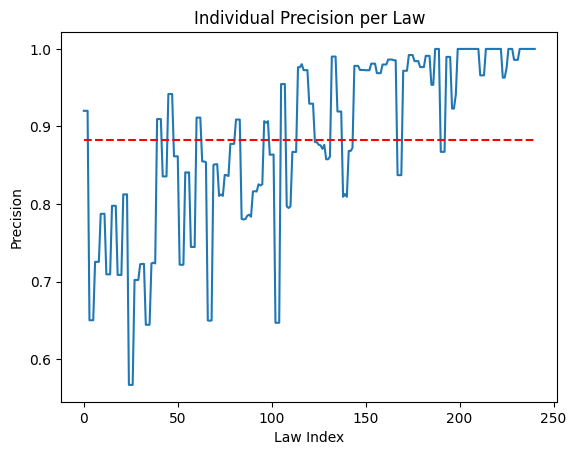

In [48]:
import matplotlib.pyplot as plt

plt.plot(range(241), individual_precision.tolist())
plt.plot(range(241), np.mean(individual_precision) * np.ones(241), 'r--')
plt.title('Individual Precision per Law')
plt.xlabel('Law Index')
plt.ylabel('Precision')
plt.show()

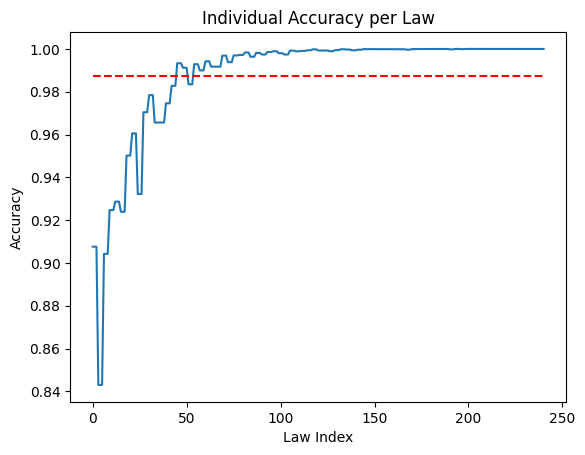

In [49]:
import matplotlib.pyplot as plt

plt.plot(range(241), individual_accuracy.tolist())
plt.plot(range(241), np.mean(individual_accuracy) * np.ones(241), 'r--')
plt.title('Individual Accuracy per Law')
plt.xlabel('Law Index')
plt.ylabel('Accuracy')
plt.show()

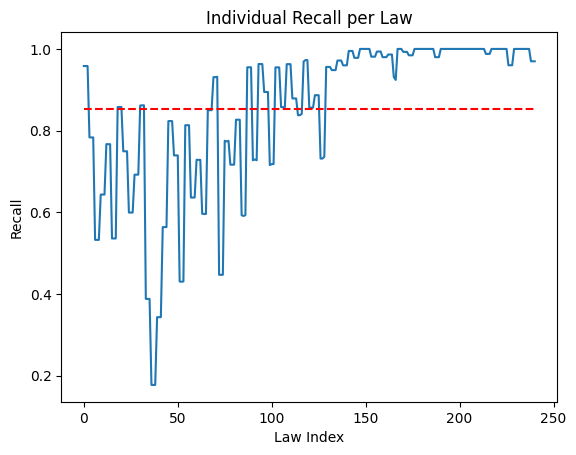

In [50]:
import matplotlib.pyplot as plt

plt.plot(range(241), individual_recall.tolist())
plt.plot(range(241), np.mean(individual_recall) * np.ones(241), 'r--')
plt.title('Individual Recall per Law')
plt.xlabel('Law Index')
plt.ylabel('Recall')
plt.show()